# Explore here

**QUESTION:**  Is there any relationship between health resources and sociodemographic data?

-----------------------------------------------------------------------------------------------------------------------------------------------

# Dataset Analysis

- Data import:

In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


- Understanding of the informaiton gathered:

In [3]:
# Ensure complete column names are displayed
pd.set_option("display.max_columns", None)

def column_summary(data):
    summary_data = []
    
    for col_name in data.columns:
        col_dtype = data[col_name].dtype
        num_of_nulls = data[col_name].isnull().sum()
        num_of_non_nulls = data[col_name].notnull().sum()
        num_of_distinct_values = data[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = data[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = data[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_data = pd.DataFrame(summary_data)
    return summary_data

# Example usage:
# Assuming df is your DataFrame
summary_data = column_summary(data)
display(summary_data)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,fips,int64,0,3140,3140,"{56045: 1, 1001: 1, 1003: 1, 1005: 1, 55109: 1..."
1,TOT_POP,int64,0,3140,3074,"{14523: 3, 11534: 2, 4472: 2, 6050: 2, 19964: ..."
2,0-9,int64,0,3140,2723,"{331: 4, 1276: 4, 715: 4, 396: 4, 3194: 4, 434..."
3,0-9 y/o % of total pop,float64,0,3140,3136,"{9.836065574: 2, 8.333333333: 2, 10.89385475: ..."
4,19-Oct,int64,0,3140,2743,"{1097: 4, 3299: 4, 2599: 4, 673: 4, 190: 4, 74..."
...,...,...,...,...,...,...
103,CKD_prevalence,float64,0,3140,43,"{3.4: 254, 3.2: 236, 3.3: 232, 3.6: 223, 3.5: ..."
104,CKD_Lower 95% CI,float64,0,3140,39,"{3.0: 273, 3.2: 264, 3.1: 262, 3.3: 238, 2.9: ..."
105,CKD_Upper 95% CI,float64,0,3140,46,"{3.6: 228, 3.7: 227, 3.5: 215, 3.8: 209, 3.9: ..."
106,CKD_number,int64,0,3140,1894,"{423: 8, 458: 8, 152: 8, 296: 8, 229: 8, 72: 7..."


In [4]:
print("\nDataset Shape (Rows, Columns):")
print(data.shape)


Dataset Shape (Rows, Columns):
(3140, 108)


In [5]:
# Ensure complete column names are displayed
pd.set_option("display.max_columns", None)

# Print all column names
print("Complete List of Column Names:")
print(data.columns.tolist())

Complete List of Column Names:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-1

- Summary of the variables: Categorical and numerical.

In [6]:
# Classify variables as categorical or numerical
categorical_vars = data.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_vars = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical Variables:")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)


Categorical Variables:
['COUNTY_NAME', 'STATE_NAME']

Numerical Variables:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 

- Finding Zeros: The zeros found in the dataset, even if they are a large number, they make sense. No zeros will be filled or removed.

In [7]:
# Ensure pandas doesn't truncate the output
pd.set_option("display.max_rows", None)

# Count the number of zeros per column
zeros_per_variable = (data == 0).sum()

print("Total Number of Zeros Per Variable:")
print(zeros_per_variable)

Total Number of Zeros Per Variable:
fips                                                                                0
TOT_POP                                                                             0
0-9                                                                                 1
0-9 y/o % of total pop                                                              1
19-Oct                                                                              1
10-19 y/o % of total pop                                                            1
20-29                                                                               1
20-29 y/o % of total pop                                                            1
30-39                                                                               0
30-39 y/o % of total pop                                                            0
40-49                                                                               0
40-49 y/o % of tot

- Missing values: No missing values found.

In [8]:
# Ensure pandas doesn't truncate the output
pd.set_option("display.max_rows", None)

# Count of missing values (NaN) per column
print("\nNumber of Missing Values per Column:")

missing_values = data.isnull().sum()
print(missing_values)


Number of Missing Values per Column:
fips                                                                             0
TOT_POP                                                                          0
0-9                                                                              0
0-9 y/o % of total pop                                                           0
19-Oct                                                                           0
10-19 y/o % of total pop                                                         0
20-29                                                                            0
20-29 y/o % of total pop                                                         0
30-39                                                                            0
30-39 y/o % of total pop                                                         0
40-49                                                                            0
40-49 y/o % of total pop                         

- Duplicate values: No duplicate values in the dataset.

In [9]:
# Checking for duplicate rows
print("\nNumber of Duplicate Rows:")
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)


Number of Duplicate Rows:
0


# Multivariate Analysis

- Variable analysis:

The categorical variables **['COUNTY_NAME', 'STATE_NAME']** are no offering information, as 'flips' is the identificator for each population, hence will drop the categorical variables.

In [10]:
data = data.drop(columns=['COUNTY_NAME', 'STATE_NAME'])

Now, I think the most likely variable to be predicted is **'Heart disease_number'** as an indicator for health status, therefore I will remove the target variable from the dataset to apply the Feature scaling to the other variables:

In [11]:
from sklearn.preprocessing import StandardScaler

# Drop the target variable
features = data.drop(columns=['Heart disease_number'])

# Apply feature scaling to the rest of the dataset
scaler = StandardScaler()
norm_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
data_cleaned = pd.DataFrame(norm_features, index=features.index, columns=features.columns)

# Add the target variable back to the scaled dataset if needed
data_cleaned['Heart disease_number'] = data['Heart disease_number']

data_cleaned.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,-0.122010,1.515069,-0.138129,0.263445,-0.176461,-1.067889,-0.156294,-0.503639,-0.167598,-0.724248,-0.155953,-0.475265,-0.051455,0.710731,-0.196442,-0.241496,-0.124761,-0.115433,-0.087858,-0.030480,-0.165397,-0.191608,-0.145679,-0.154872,-0.316235,0.250655,-0.284799,0.344613,-0.513170,0.060785,-0.045366,-0.117586,-0.132905,-0.158201,-0.145939,-0.333019,-0.234382,-0.447577,0.649528,-0.125899,-0.221739,-0.202843,-0.043632,0.472531,0.370220,0.566185,-0.151210,-0.151024,-0.152525,-0.353571,0.472531,1.468943,-0.894491,-0.934081,-0.856179,-0.846273,-0.017028,0.110809,-0.154944,-0.256149,-0.117965,-0.171894,-0.173594,-0.175321,-0.210637,-0.143727,-0.175907,-1.013112,-1.936434,-0.952441,-0.148472,0.126376,0.116487,0.087963,-0.133552,0.172860,0.177849,0.154082,-0.135426,-0.402548,-0.380391,-0.392897,-0.211219,-0.256304,-0.206071,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,0.332513,0.715673,0.382732,0.153177,0.521999,0.215895,0.676174,0.543366,0.442092,-0.284722,0.466348,0.170748,0.093946,-0.027772,0.067848,-0.203651,-0.083125,-0.141497,-0.049532,-0.076506,0.094029,-0.219210,0.341296,1.518514,-0.057592,-0.264720,-0.024296,-0.173131,-0.282330,2.122197,2.080476,0.

- Now will divide the dataset into **train and test**:

In [12]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)
X = data_cleaned.drop(columns=['Heart disease_number'])  # Features
y = data_cleaned['Heart disease_number']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_indices = list(X_train.index)
test_indices = list(X_test.index)

# Display the shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2512, 105)
X_test shape: (628, 105)
y_train shape: (2512,)
y_test shape: (628,)


Will calculate how many variables out of the **105 variables** will be selected for the experiment. In this case we will not select the K_n values, those will be calulated by the SelectKBest methodology.

As we have studied, will select a methodology to choose the best variables for our model:

- SelectKBest.
- Ridge linear regression: We try to find the line that fits best, but we also want to keep the slope of the line as small as possible.
- **Lasso linear regression:** As with Ridge, we try to fit the line and keep the slope small, but Lasso can take the slope to zero if that helps fit the data. This is like "cherry-picking" which variables are important and which are not, because it can reduce the importance of some variables to zero.

Based on these definitions, it seems like Lasso Linear Regression methodology offers exactly what we need. So In the further steps **will apply Lasso L.R.** to our situation:

In [13]:
# Combine features and target variable for train and test datasets
X_train["Heart disease_number"] = y_train.values
X_test["Heart disease_number"] = y_test.values

# Save the datasets to CSV files
train_data = X_train.to_csv("train_data_with_target.csv", index=False)
test_data = X_test.to_csv("test_data_with_target.csv", index=False)

print("Train and test datasets with target variable have been saved successfully!")

Train and test datasets with target variable have been saved successfully!


In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", None)

# Instantiate and fit the Lasso model
lasso_model = Lasso(alpha=0.1, max_iter=300, random_state=42)
lasso_model.fit(X_train, y_train)

# Predict using the test data
y_pred = lasso_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Extract and display feature importance
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_train.columns)
important_features = lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)
print("Important Features Selected by Lasso Regression:")
print(important_features)

Mean Squared Error: 196013.6470
R² Score: 0.9978
Important Features Selected by Lasso Regression:
TOT_POP                                                                          7639.950650
Population Aged 60+                                                              2894.514168
COPD_number                                                                      2691.221607
70-79                                                                            2204.921558
anycondition_number                                                              1989.219339
POVALL_2018                                                                      1851.155190
40-49                                                                            1664.404817
POP_ESTIMATE_2018                                                                1558.063404
High school diploma only 2014-18                                                 1136.861881
Total Population                                                 

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


**Structure of the Model for Prediction**


The Lasso regression model is structured as:

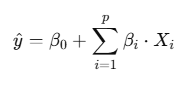

To predict, the model multiplies each input variable by its learned coefficient (𝛽𝑖) and sums these values along with the intercept. The equation encapsulates the relationship between the predictors (X_train) and the target variable (y_train).

- Comparing results between train and test data:

In [ ]:
# Predict on training data
y_train_pred = lasso_model.predict(X_train)

# Predict on test data
y_test_pred = lasso_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate on test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training Data:")
print(f"  MSE: {mse_train:.3f}, R²: {r2_train:.3f}")
print("Test Data:")
print(f"  MSE: {mse_test:.3f}, R²: {r2_test:.3f}")

Training Data:
  MSE: 136592.659, R²: 1.000
Test Data:
  MSE: 196013.647, R²: 0.998


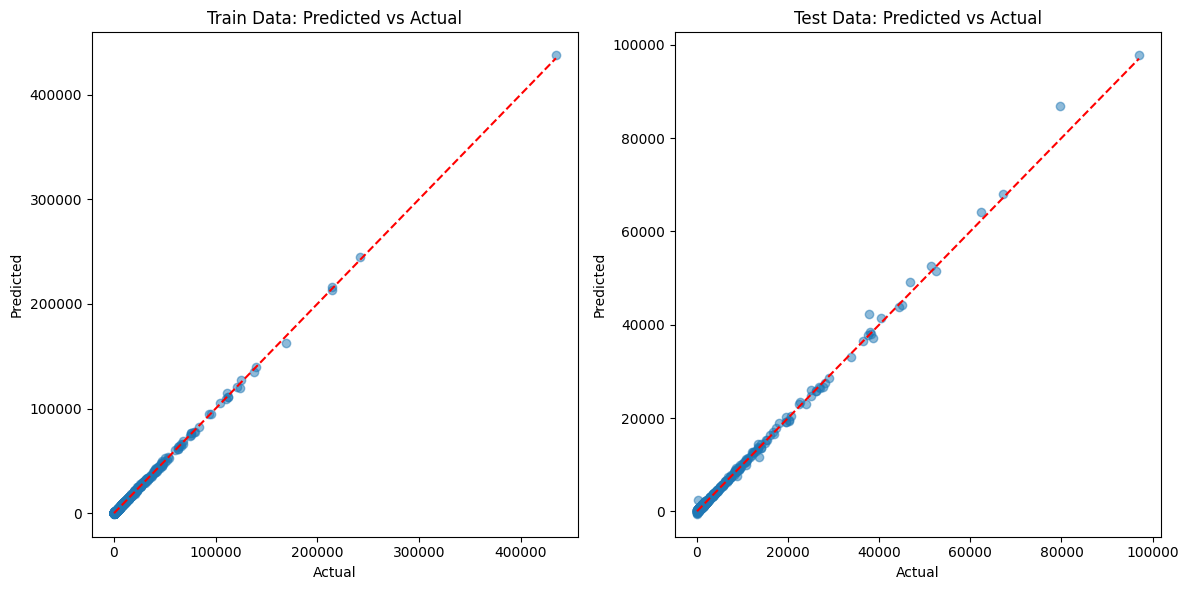

In [18]:
import matplotlib.pyplot as plt

# Plot predicted vs actual for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train Data: Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Plot predicted vs actual for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test Data: Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

**Interpretation**

Train R² ≈ Test R².
Both MSEs are close to each other.

Predicted vs. train are getting similar results. Hence is a very good model! :)

# CONCLUSIONS


Based on the results of the machine learning model and the study of the dataset, we can extact the follwoing conclusions regarding the relationship between **health resources and sociodemographic data**:

1. There is a significant relationship between health resources and sociodemographic data.

2. Key sociodemographic factors influencing health resources:

    -Population size or density.

    -Economic indicators (i.e, income level or employment rates).

    -Education levels might correlate with better awareness and demand for healthcare services.

    -Geographical features (e.g., urban vs. rural) could also play a role in accessibility and distribution.

3. Resource optimization algorithms:

    -AI models to dynamically allocate health resources based on predicted demand.

    -Healthcare access dashboards: Tools to visualize gaps in health resources for stakeholders.

    -Predictive modeling services: Offering consultancy to governments or NGOs using machine learning to plan health resource allocation.
